# Clusterização com machine learning em dataset de vinhos

O presente projeto tem como objetivo aplicar algoritmos de machine learning, mais especificamente Clusterização, em um dataset de vinhos, classificando-os em grupos heterogêneos de acordo com algumas características das composições químicas de cada amostra.

## Bibliotecas utilizadas

Para desenvolver este projeto, foi necessário importar as seguintes bibliotecas do Python,

In [1]:
# lib para carregamento do dataset
from sklearn import datasets

# libs de manipulação e exploração dos dados
import numpy as np
import pandas as pd

# lib de visualização dos dados
import matplotlib.pyplot as plt

# pré-processamento dos dados
from sklearn.preprocessing import scale

# modelos de cluster
from sklearn.cluster import KMeans

# métricas
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import kelbow_visualizer, silhouette_visualizer

## Importando o dataset

Importadas as bibliotecas, agora carregou-se o dataset para o desenvolvimento do modelo, que se encontra na biblioteca sklearn, conforme demonstrado a seguir,

In [2]:
df_wines,_ = datasets.load_wine(as_frame = True, return_X_y = True)
df_wines

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


## Análise Exploratória e Descritiva dos Dados

Primeiro, foi feita uma breve análise exploratória e descritiva dos dados. Exibindo-se mais informações a respeito do dataset,

In [3]:
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

Primeira observação importante: todas as colunas apresentam dados exclusivamente numéricos. Isto é crucial pois o modelo KMeans que será testado posteriormente tem como exigência que os dados de entrada sejam todos numéricos.

Segunda observação importante: não tem-se nenhum dado nulo em nenhuma coluna, visto que a quantidade de dados não nulos em cada uma delas é igual a quantidade total de entradas por coluna (178). Isto pode também ser verificado pelo código abaixo.

In [4]:
df_wines.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

Conforme esperado, não existem dados nulos em nenhuma das colunas.

Verificando agora a existência de linhas duplicadas,

In [5]:
df_wines.duplicated().sum()

0

Também não temos dados duplicados.

Avaliou-se agora a existência de outliers. Para tal foi plotado um gráfico do tipo Box, mostrando os valores mínimo, máximo, mediana, primeiro e terceiro quartis de cada coluna.

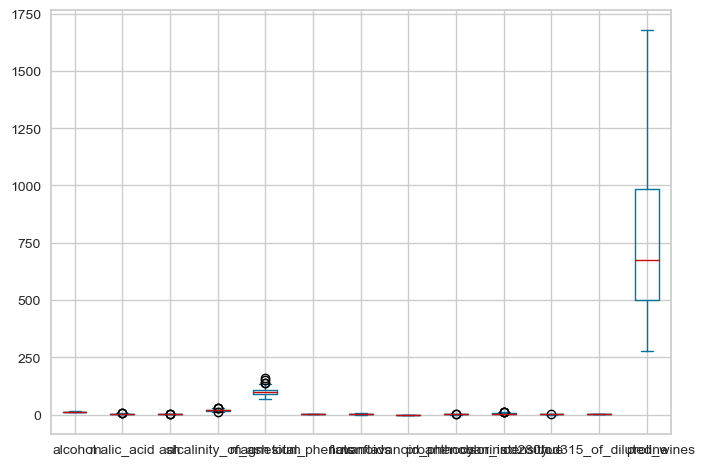

In [23]:
df_wines.plot.box();

Para melhorar a visualização da legenda (visto que os nomes estão sobrepostos) utilizou-se da função xticks() da biblioteca do Matplotlib, permitindo rotacionar cada um dos nomes em um ângulo pré-definido, no sentido também a ser escolhido. Neste exemplo rotacionou-se os nomes em 60 graus para a direita, conforme demonstrado abaixo,

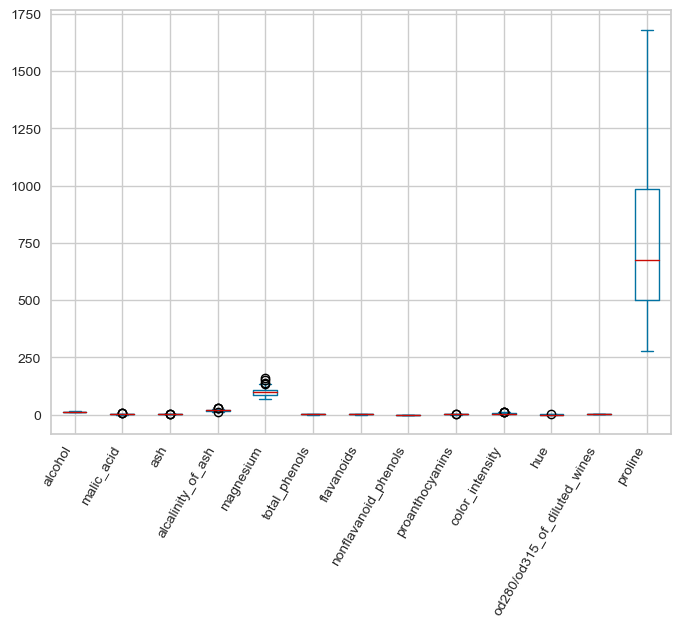

In [7]:
df_wines.plot.box()
plt.xticks(rotation = 60, ha = 'right');

Assim corrigiu-se a legenda, contudo os dados continuam na sua maior parte "comprimidos" ou "achatados" na sua visualização. Isto acontece pois temos colunas com escalas numéricas muito diferentes. Este também é um problema ao rodar o modelo de KMeans, visto que para o seu correto funcionamento, os dados numéricos precisam estar na mesma escala. Assim, para corrigir isso aplicou-se a função scale() da biblioteca scikit-learn importada anteriormente. Esta função irá transformar os dados de todas as colunas de tal modo a convertê-los para valores onde distribuição dos dados por coluna terá média igual a zero e desvio padrão igual a 1. Este processo é demonstrado a seguir,

In [24]:
# criando o dataframe escalonado
df_wines_scaled = df_wines.apply(scale)

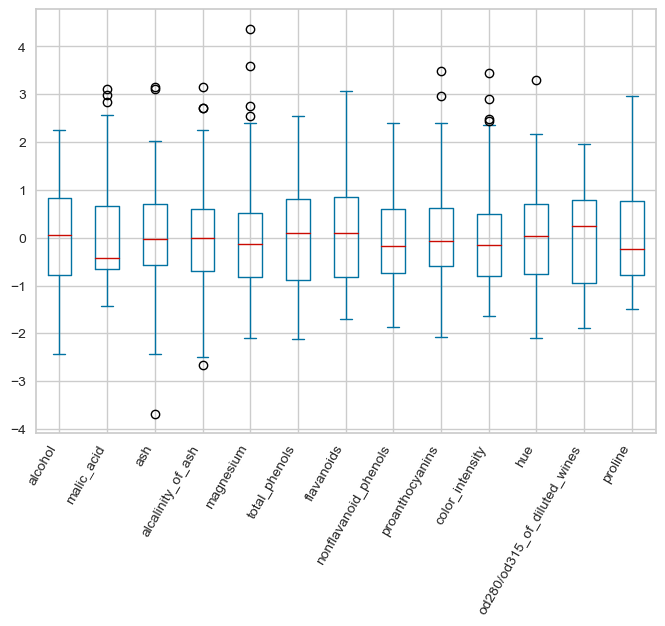

In [25]:
# plotando o gráfico Box utilizando o dataframe escalonado
df_wines_scaled.plot.box()
plt.xticks(rotation = 60, ha = 'right');

Agora sim tem-se uma vsiualização muito mais limpa e clara da distribuição dos dados. Desta forma, avaliando o resultado acima, fica evidente a presença de outliers neste dataset, representados pelos círculos.

Afim de identificá-los de forma mais exata, utilizou-se do padrão Z-score, onde |Z-score| > 3. Para tal, utilizou-se a linha de código abaixo onde:

- A função .abs() seleciona somente o valor absoluto de todos os dados (como se fosse o valor em módulo, desconsiderando o sinal)
- E a função .gt(3) faz um comparativo se o valor do dado em questão é maior que 3 (funciona da mesma forma que a simbologia > 3). Caso fosse escrito .gt(5) iria comparar se o valor é maior que 5, e assim por diante.
- Na execução, como as duas funções estão em cadeia (uma seguida da outra), o resultado final então irá retornar True (por conta da utilização da função .any(axis = 1)) para todas as linhas que apresentam dados com valor absoluto maiores que 3. Feito isto, será somada a quantidade de "True" retornados (utilizando a função .sum()).

In [10]:
outlier_rows = df_wines_scaled.abs().gt(3).any(axis=1)
outlier_rows.sum()

10

Portanto, existem 10 linhas com dados outliers. Exibindo-as a seguir,

In [11]:
df_wines_scaled[outlier_rows]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
25,0.061000,-0.257044,3.119772,1.653086,1.703265,0.536601,0.653312,0.871420,0.576613,-0.639377,0.757038,0.830961,0.264653
59,-0.778980,-1.253450,-3.679162,-2.671018,-0.824415,-0.504914,-1.465058,-0.659563,-2.051513,-1.344466,0.406051,-1.118210,-0.722540
69,-0.976623,-1.029035,-2.253579,-0.809251,3.599025,-0.713218,-0.752242,-1.787656,1.592822,-0.955153,1.415139,0.647343,-0.092010
73,-0.013116,-0.598156,0.853460,3.154511,2.756465,1.610163,0.864145,-1.223610,0.646696,-0.738868,1.546759,1.254694,0.758249
95,-0.655454,-0.732806,-0.608676,-0.148624,4.371372,0.328298,0.241685,-0.337251,2.959447,-1.063296,0.888658,0.025868,0.605394
110,-1.903071,1.260006,-1.997705,0.001518,0.509638,1.417883,0.552915,-0.981875,3.485073,-0.933525,-0.910151,0.280108,-0.588791
115,-2.434235,-0.741782,-0.608676,0.602088,-1.035055,0.264205,0.141289,1.274310,0.734300,-1.366095,3.301694,0.364855,-1.082388
121,-1.779545,-0.257044,3.156325,2.704083,1.352198,1.417883,3.062832,0.871420,0.489009,0.407442,-0.120430,1.523058,-0.897687
123,0.061000,3.109192,-0.864550,0.602088,-0.964842,0.520578,0.623193,-0.498407,0.734300,-1.063296,-0.997898,0.689716,-1.168369
158,1.654492,-0.589180,1.218995,1.653086,-0.122282,0.808997,-0.722123,1.354888,1.943238,3.435432,-1.699872,-0.920468,-0.276711


Neste caso, adotou-se a estratégia de excluir tais linhas da análise, visto que são poucos casos de outliers. Para excluir estas linhas, basta aplicar um filtro no dataset padronizado, desconsiderando todas estas linhas. Isto é demonstrado abaixo:

In [12]:
df_wines_scaled = df_wines_scaled[~outlier_rows]

## Modelling

Feito o tratamento dos dados numéricos e excluídos os outliers, agora é possível partir para a parte de desenvolvimento do modelo.

### Determinando o valor de K

Como não se sabe ao certo a quantidade de clusters em que se deseja dividir o dataset, é possível utilizar o chamado "Método do Cotovelo", no qual, utilizando a função kelbow_visualizer, da biblioteca yellowbrick importada anteriormente, temos um gráfico da variância em função do número de clusters. Com isto, é possível definir o ponto ótimo para o valor de k.

Desta forma, utilizando a linha de código abaixo, plotou-se o gráfico do "cotovelo" (o teste foi realizado com valores de K variando de 2 até 10).

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

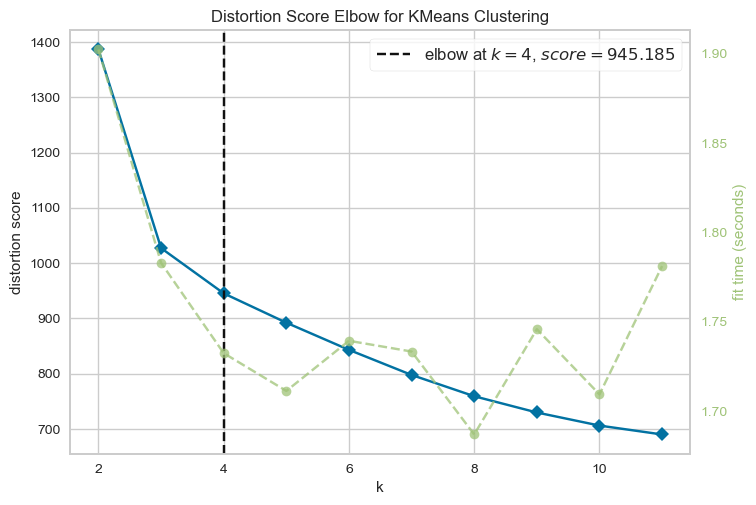

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=11, n_init=10), k=11)

In [13]:
kelbow_visualizer(KMeans(n_init=10), df_wines_scaled, k = 11)

Analisando o gráfico acima, temos que o ponto ótimo se da com um valor de K = 4. É possível concluir isto pois, para valores maiores que 4, o score de variância dos dados diminui de forma não abrupta, se comparado a valores de K menores que 4, onde a redução da variância se da de forma mais drástica com o aumento gradual de clusters.

Outro fator importante é a interpretabilidade dos clusters. Quanto maior o valor de K, mais clusters, ou seja, em mais grupos serão divididos os dados. Avaliando do ponto de vista de negócio, isto pode ser ruim pois muitos grupos dificultam a própria interpretação das diferenças entre eles, ficando mais difícil também classificá-los e analisa-los.

### Clusterizando

Escolhido o valor de K, agora temos o modelo definido abaixo,

In [26]:
model = KMeans(n_clusters = 4, n_init = 10)

Treinando o modelo com o dataset escalonado sem outliers,

In [27]:
model.fit(df_wines_scaled)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init=10)

Salvando os resultados dos centroides e clusters,

In [28]:
centroids = model.cluster_centers_
labels = model.labels_

### Interpretando os clusters

Para visualizar e interpretar os resultados, primeiro definiu-se um Data Frame com as respectivas coordenadas dos centróides.

In [29]:
centroids_df = pd.DataFrame(centroids, columns = df_wines.columns)
centroids_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.186543,0.904971,0.249210,0.583703,-0.050635,-0.988557,-1.236195,0.716842,-0.749608,0.988498,-1.191299,-1.301540,-0.380045
1,0.946641,-0.370374,0.230094,-0.802280,0.505877,0.888828,0.971354,-0.613519,0.590379,0.222132,0.484396,0.757564,1.246671
2,-0.867587,-0.609550,-0.792849,-0.007721,-0.597572,-0.257169,-0.112599,0.078036,-0.220585,-0.861069,0.536490,0.132888,-0.775819
3,-0.811332,0.385426,0.768169,0.796559,0.248846,0.573226,0.572994,-0.229813,0.720951,-0.766676,0.159524,0.687699,-0.516610


A ideia geral aqui é criar uma figura onde, para cada linha, é exibido o gráfico de barras de cada cluster. Logo, foi criada uma figura, utilizando o Matplotlib, com 4 linhas, pois são 4 clusters, compartilhando o mesmo eixo X para todos os gráficos (sharex = True). Em seguida, criou-se uma estrutura de loop, utilizando "for", onde, a cada repetição, serão selecionados todos os valores da linha do data frame definido acima. Valores estes que representam os dados de cada cluster definido pelo modelo anteriormente calculado.

O código abaixo mostra esta análise,

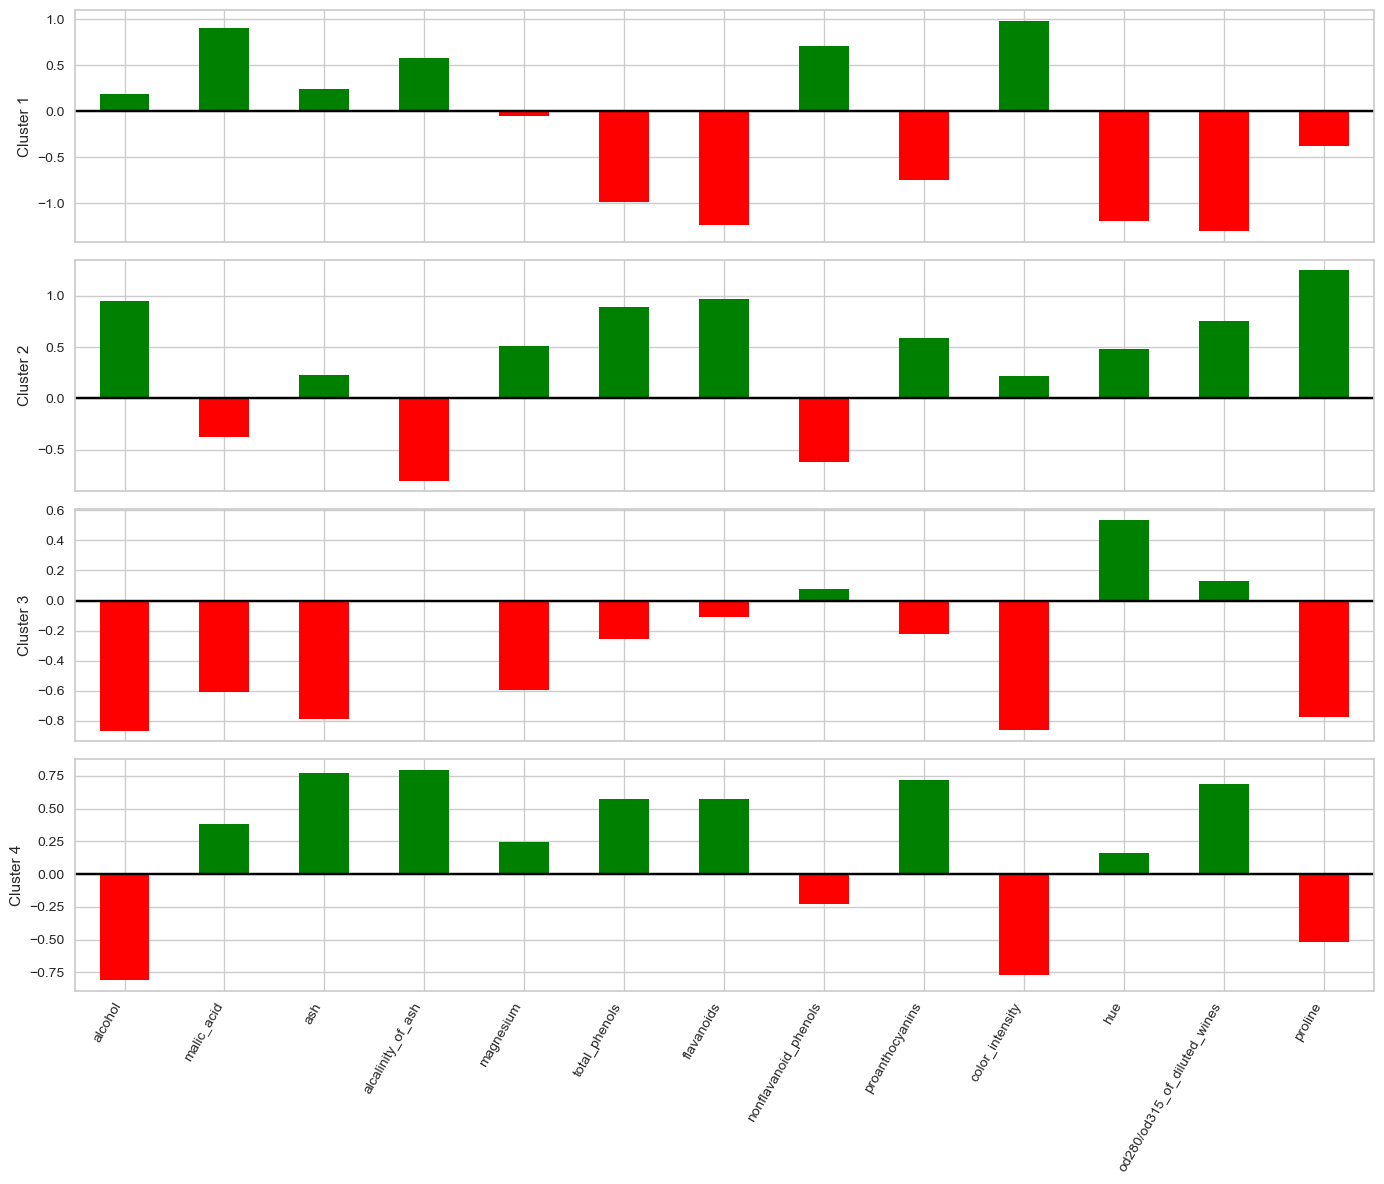

In [32]:
fig, axes = plt.subplots(nrows = 4, figsize = (14,12), sharex = True)

for i, ax in enumerate(axes):
    center = centroids_df.loc[i,:]  # selecionando os valores por linha do dataframe
    colors = ['green' if l > 0 else 'red' for l in center]  # definindo um condicional para pintar de verde caso o valor
                                                            # seja positivo ou de vermelho caso seja negativo
    center.plot.bar(ax = ax, color = colors)    # plotando os gráficos
    ax.set_ylabel(f'Cluster {i+1}')             # ajustando o nome do eixo y para cada gráfico
    ax.axhline(color = 'black')                 # definindo a cor do eixo horizontal em y = 0

plt.xticks(rotation = 60, ha = 'right') # ajuste da legenda
plt.tight_layout()  # ajustar o espaço entre os gráficos de forma automática
plt.show()

Avaliando-se os resultados dos gráficos acima, percebe-se que o "Cluster 1" é o grupo que apresenta os vinhos com maiores índices em "malic_acid" e "color_intensity", mas com índices baixíssimos em "flavanoids" por exemplo. Já o "Cluster 2" tem índices altos em "alcohol" e "proline". O "Cluster 3" se caracteriza como o grupo com menor teor de "alcohol" e "proline", enquanto que o "Cluster 4" tem os valores mais elevados em "alcalinity_of_ash" e "proanthocyanins". Esta é uma das formas de avaliar as diferenças nas características detectadas pelo modelo para cada cluster definido.

Outra forma de interpretar os resultados da clusterização seria agrupar os dados originais (desconsiderando os outliers) por cluster. Assim, pode-se utilizar funções de agregação em cada uma das características (média, mediana, mínimo, máximo, etc.).

In [19]:
(
  df_wines[~outlier_rows].assign(cluster=labels)
  .groupby('cluster')
  .agg(['mean','min','median','max'])
)

alcohol                       malic_acid                     \
              mean    min  median    max       mean   min median   max   
cluster                                                                  
0        12.212000  11.41  12.080  13.49   1.896000  0.74  1.630  4.43   
1        13.778214  12.85  13.765  14.83   1.983929  1.35  1.765  4.04   
2        13.119592  12.20  13.110  14.16   3.380204  1.24  3.300  5.65   
3        12.364211  11.45  12.335  13.86   1.831316  0.89  1.520  4.31   

              ash        ...    hue       od280/od315_of_diluted_wines        \
             mean   min  ... median   max                         mean   min   
cluster                  ...                                                   
0        2.418800  2.02  ...  0.980  1.45                     2.502400  1.59   
1        2.451250  2.04  ...  1.065  1.28                     3.168214  2.51   
2        2.420000  1.98  ...  0.670  0.96                     1.693469  1.27   
3        2.150263  1.70  ...  1.060  1.42                     2.980789  2.14   

                          proline                         
        median   max         mean    min  median     max  
cluster                                                   
0        2.500  3.30   524.040000  315.0   495.0   870.0  
1        3.170  4.00  1130.303571  735.0  1100.0  1680.0  
2        1.680  2.47   621.673469  372.0   620.0   880.0  
3        3.035  3.64   516.394737  278.0   479.0  1020.0  

[4 rows x 52 columns]

Agrupando os resultados pela média, por exemplo,

In [20]:
(
  df_wines[~outlier_rows].assign(cluster=labels)
  .groupby('cluster')
  .mean()
  .transpose()
  .style.background_gradient(cmap='YlOrRd', axis=1)
)

cluster,0,1,2,3
alcohol,12.212000,13.778214,13.119592,12.364211
malic_acid,1.896000,1.983929,3.380204,1.831316
ash,2.418800,2.451250,2.420000,2.150263
alcalinity_of_ash,21.656000,16.914286,21.255102,19.015789
magnesium,92.760000,106.232143,98.653061,91.921053
total_phenols,1.902800,2.855357,1.654286,2.460526
flavanoids,1.663600,3.000179,0.796735,2.344474
nonflavanoid_phenols,0.460800,0.286429,0.448776,0.299474
proanthocyanins,1.308000,1.912679,1.124898,1.736842
color_intensity,2.940000,5.616607,7.147347,3.193684


Avaliando a tabela acima com a média das características em cada cluster calculado pelo algoritmo KMeans, percebe-se que o Grupo_1 é o cluster que apresenta,  o maior índice em "proline" e "alcohol". Enquanto que o Grupo_0 tem em média o índice de "color_intesity" mais elevado se comparado aos demais clusters. Outro ponto interessante é que todos os clusters apresentam o índice "hue" em torno de 1, exceto o Grupo_0, com 0.68. Isto também é uma característica que pode diferenciar este grupo dos demais.

Calculando agora a métrica de Silhoueta,

In [21]:
silhouette_score(df_wines_scaled[~outlier_rows], labels)

C:\Users\User\AppData\Local\Temp\ipykernel_9584\1385804645.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  silhouette_score(df_wines_scaled[~outlier_rows], labels)


0.24989859662052233

Tem-se então um silhouette_score de 0.245. A métrica está positiva, o que é um bom sinal, pois isto nos diz que os pontos de um mesmo cluster definido pelo modelo estão mais próximos entre si do que dos pontos de outro cluster. Contudo não estão tão próximos assim, visto que o valor do silhouette está consideravelmente distante de 1 (lembrando que o valor máximo de silhouette_score é 1). Quanto mais próximo 1, quer dizer que mais próximos estão os pontos de um mesmo cluster e mais distantes eles estão dos outros clusters, o que demonstra uma homogeneidade marcante dentre as características do cluster e uma heterogeneidade clara se comparada aos demais grupos definidos.

Para visualizar os scores de silhouette por grupo, utilizou-se da função silhouette_visualizer abaixo.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


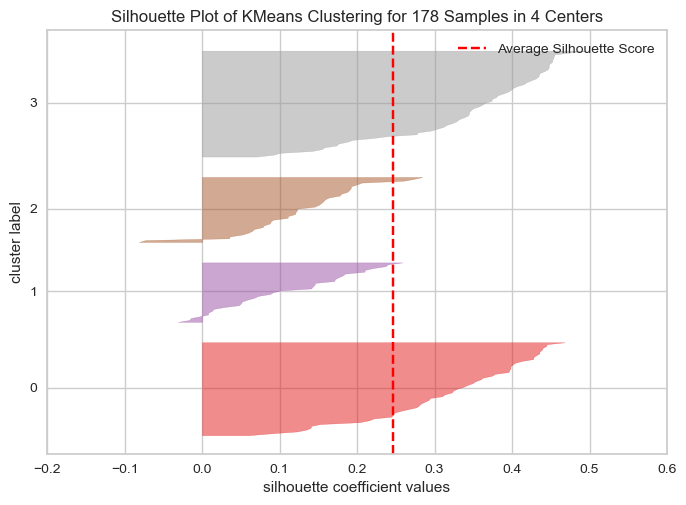

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 178 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(n_clusters=4, n_init=10))

In [33]:
silhouette_visualizer(KMeans(n_clusters = 4, n_init = 10), df_wines_scaled)

Assim, os grupos que apresentam melhor métrica de Silhouette foram os clusters 0 e 3, com valores próximos a 0.45. Portanto são este grupos os mais homogêneos entre os pontos dentro deles e mais heterogêneos se comparados aos demais. Enquanto que o grupo com silhouette mais baixo foi o cluster 1, com valores mais próximos de 0.2.